# Maximum Vertex Weighted Clique Problem

For this problem we will first load the instance that we will work using the Networkx library, then we will transform the loaded graphs into an adjacency matrix that will be a square matrix nxn where n is the number of vertices in the instance. Each position of the array will receive 0 if there is no edge connecting the vertices and 1 if there is an edge connecting the vertices.

In [2]:
# Imports
import networkx as nx
import matplotlib.pyplot as plt
import random, math
import numpy as np
import pandas as pd

%matplotlib inline

In [3]:
fh=open("frb53-24-1.mis", 'rb')
G=nx.read_edgelist(fh)
fh.close()

In [57]:
A = nx.adjacency_matrix(G)
print(A.todense())

[[0 1 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 1 0 1]
 [0 0 0 ... 1 1 0]]


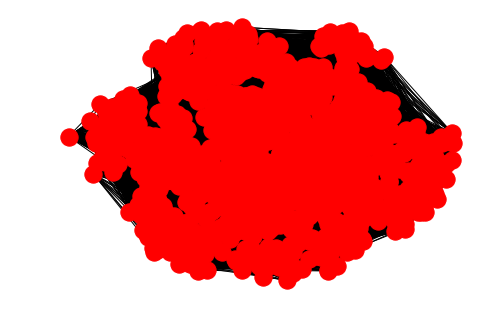

In [47]:
nx.draw(G)

In [244]:
n_nodes = G.number_of_nodes()
n_edges = G.number_of_edges()
print(n_nodes, n_edges)

cliques = nx.clique
g_cliques = cliques.find_cliques_recursive(G)

g_cliques.

#for clique in g_cliques:
 #   print(clique)
print(g_list)

1272 94227


TypeError: can't send non-None value to a just-started generator

In [48]:
Gm = nx.to_numpy_matrix(G)
df = pd.DataFrame(Gm)

In [79]:
df= df.mul(-100)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271
0,-0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
1,-100.0,-0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
2,-100.0,-100.0,-0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
3,-100.0,-100.0,-100.0,-0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
4,-100.0,-100.0,-100.0,-100.0,-0.0,-100.0,-100.0,-100.0,-100.0,-100.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [51]:
#plt.hist(df);

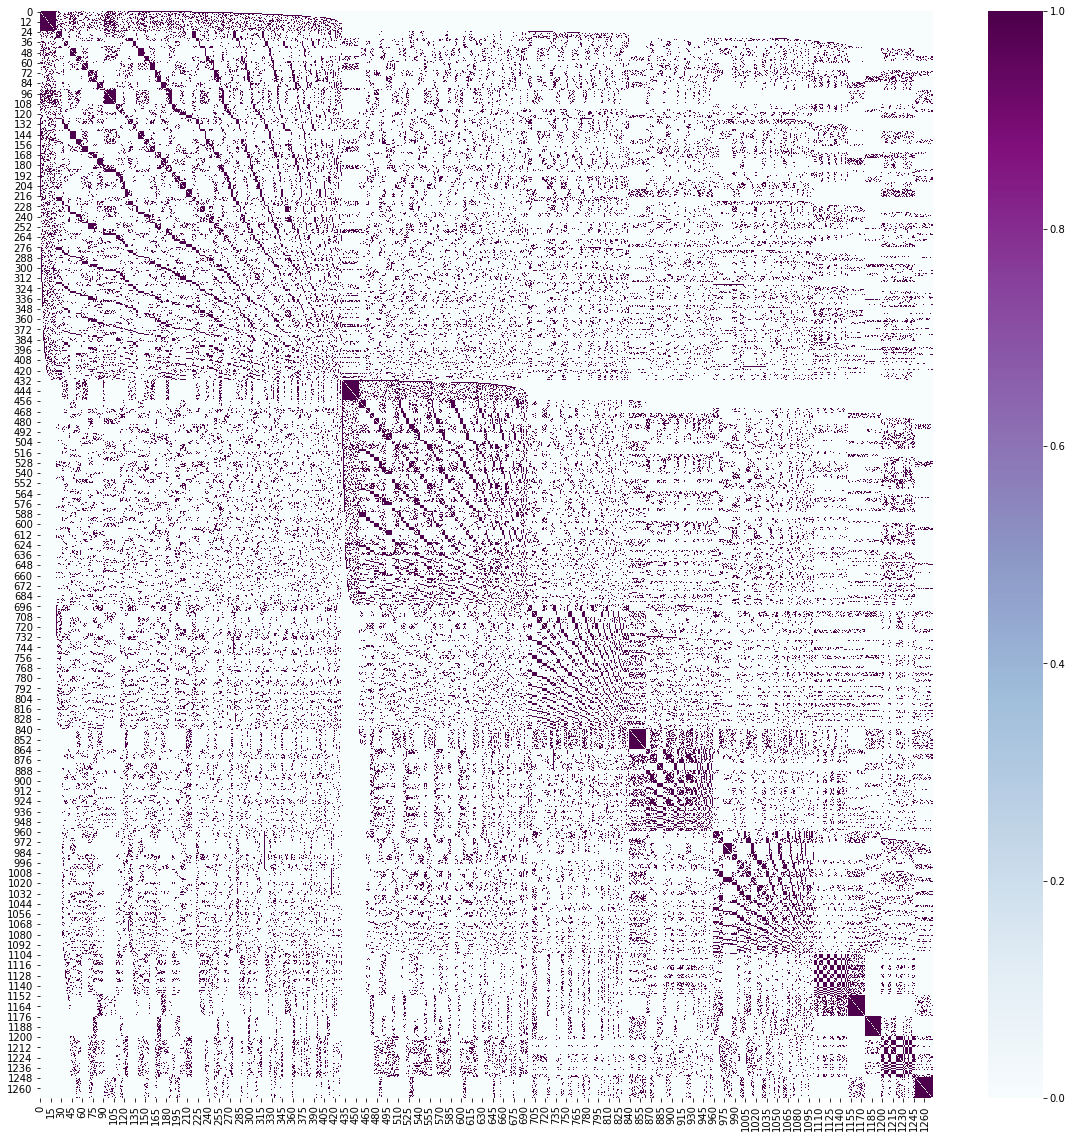

In [52]:
import seaborn as sns
plt.subplots(figsize=(20,20))
sns.heatmap(df, cmap="BuPu");

In [138]:
def addWeightToVector(df):
    weights = pd.DataFrame(np.zeros([1,1272]))
    for i in range(len(df.index)):
        weights[i] += (i % 200) + 1
    print(weights)
    return weights           

In [143]:
weights = addWeightToVector(df)
weights.T.describe()

   0     1     2     3     4     5     6     7     8     9     ...   1262  \
0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0  10.0  ...   63.0   

   1263  1264  1265  1266  1267  1268  1269  1270  1271  
0  64.0  65.0  66.0  67.0  68.0  69.0  70.0  71.0  72.0  

[1 rows x 1272 columns]


,0
count,1272.000000
mean,96.877358
std,58.227266
min,1.000000
25%,46.000000
50%,94.500000
75%,147.250000
max,200.000000


# Método de busca local

In [151]:
print(df.loc[np.random.randint(0,1272)])

0        -0.0
1        -0.0
2        -0.0
3        -0.0
4        -0.0
5        -0.0
6        -0.0
7        -0.0
8        -0.0
9        -0.0
10       -0.0
11       -0.0
12       -0.0
13       -0.0
14       -0.0
15       -0.0
16       -0.0
17       -0.0
18       -0.0
19       -0.0
20       -0.0
21       -0.0
22       -0.0
23       -0.0
24       -0.0
25       -0.0
26       -0.0
27       -0.0
28       -0.0
29       -0.0
        ...  
1242     -0.0
1243     -0.0
1244   -100.0
1245   -100.0
1246     -0.0
1247     -0.0
1248     -0.0
1249     -0.0
1250     -0.0
1251   -100.0
1252     -0.0
1253   -100.0
1254     -0.0
1255     -0.0
1256   -100.0
1257     -0.0
1258     -0.0
1259     -0.0
1260     -0.0
1261     -0.0
1262     -0.0
1263     -0.0
1264     -0.0
1265   -100.0
1266     -0.0
1267     -0.0
1268     -0.0
1269     -0.0
1270     -0.0
1271   -100.0
Name: 925, Length: 1272, dtype: float64


In [208]:
init_sol = df.loc[np.random.randint(0,1272)]
value = init_sol.dot(weights.T)

sol = init_sol
best = value
step = 0
while True:
    #Estratégia 1-flip
    viz = np.random.randint(0,1272)
    if sol[viz] == 0:
        sol[viz] = -100
    else:
        sol[viz] = 0
    value_sol = sol.dot(weights.T)
    if(best.item() < value_sol.item()):
        best = value_sol
        sol = valu
    step += 1
    if step == 50000:
        break

In [209]:
print(best)

0   -1573800.0
Name: 736, dtype: float64
